<a href="https://colab.research.google.com/github/Ankurac7/ML-Models/blob/main/House_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Real_Estate.csv')

In [ ]:
df.head()

,No,X1_Transaction_Date,X2_House_Age,X3_Distance_of_Nearest_MRT_Station,X4_Number_of_Convenience_Stores,X5_Latitude,X6_Longitude,Y_House_Price_of_Unit_Area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
print(df.shape)
print(df.columns)
df.describe()

In [ ]:
reg=linear_model.LinearRegression()
train,test=train_test_split(df,test_size=0.2,random_state=42)
train_x=np.asanyarray(train[['X1_Transaction_Date','X2_House_Age','X3_Distance_of_Nearest_MRT_Station','X4_Number_of_Convenience_Stores','X5_Latitude','X6_Longitude']])
train_y=np.asanyarray(train[['Y_House_Price_of_Unit_Area']])
reg.fit(train_x,train_y)
print('coeffecient',reg.coef_)
print('intercept',reg.intercept_)

coeffecient [[ 5.44074186e+00 -2.70791490e-01 -4.75863892e-03  1.09142527e+00
   2.29043054e+02 -2.94925908e+01]]
intercept [-13044.23191716]


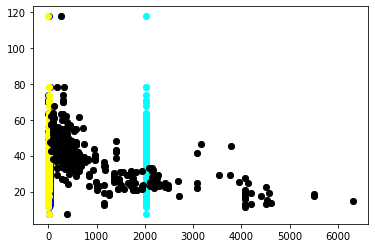

In [ ]:
plt.scatter(train.X1_Transaction_Date,train.Y_House_Price_of_Unit_Area, color='cyan')
plt.scatter(train.X2_House_Age,train.Y_House_Price_of_Unit_Area, color='blue')
plt.scatter(train.X3_Distance_of_Nearest_MRT_Station,train.Y_House_Price_of_Unit_Area, color='green')
plt.scatter(train.X4_Number_of_Convenience_Stores,train.Y_House_Price_of_Unit_Area, color='yellow')
plt.scatter(train.X3_Distance_of_Nearest_MRT_Station,train.Y_House_Price_of_Unit_Area, color='pink')
plt.scatter(train.X3_Distance_of_Nearest_MRT_Station,train.Y_House_Price_of_Unit_Area, color='black')
#plt.plot(trd_x,slr.coef_[0][0]*trd_x + slr.intercept_, color ='blue')
plt.show()

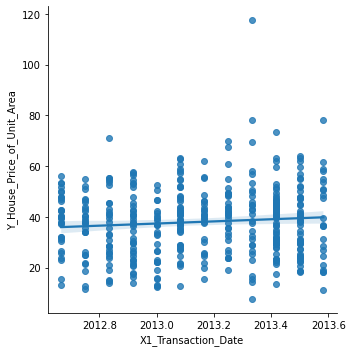

In [ ]:
sns.lmplot(x='X1_Transaction_Date', y='Y_House_Price_of_Unit_Area', data=df)

In [ ]:
test_x=np.asanyarray(test[['X1_Transaction_Date','X2_House_Age','X3_Distance_of_Nearest_MRT_Station','X4_Number_of_Convenience_Stores','X5_Latitude','X6_Longitude']])
test_y=np.asanyarray(test[['Y_House_Price_of_Unit_Area']])
test_y_predicted=reg.predict(test_x)

In [ ]:
np.mean(np.absolute(test_y_predicted-test_y))

5.30535569007425

In [ ]:
np.mean((test_y_predicted - test_y)**2)

53.50561912450548

In [ ]:
r2_score(test_y,test_y_predicted)

0.6810580555095742